In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk wordcloud


   ---------------------------------------- 299.9/299.9 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import warnings

warnings.filterwarnings("ignore")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
data = pd.read_csv('Twitter_Data.csv')
print(data.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [3]:
print(data.info())
print(data['category'].value_counts())  # Check sentiment distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
 1.0    72250
 0.0    55213
-1.0    35510
Name: category, dtype: int64


In [9]:
def clean_text(text):
    # Check if text is NaN or non-string and handle it
    if not isinstance(text, str):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Ensure no missing values in the 'text' column
data['clean_text'] = data['category'].fillna("")

# Apply the clean_text function
data['clean_text'] = data['category'].apply(clean_text)

print(data.head())



  clean_text category
0                -1.0
1                 0.0
2                 1.0
3                 1.0
4                 1.0


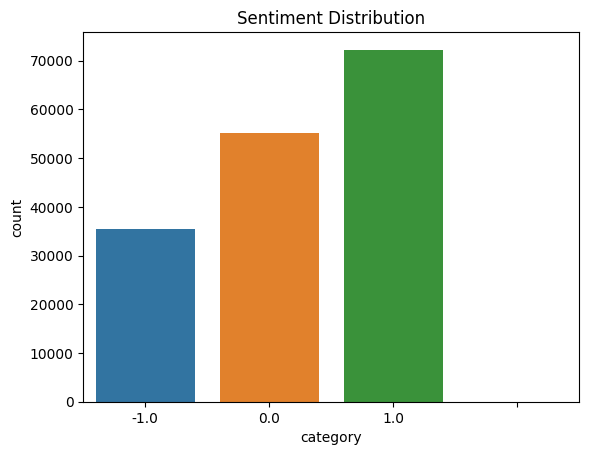

In [11]:
sns.countplot(x='category', data=data)
plt.title('Sentiment Distribution')
plt.show()


In [14]:
# Generate Positive WordCloud
positive_text = ' '.join(data[data['category'] == 'positive']['clean_text'])

if positive_text.strip():  # Check if positive_text is not empty
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Positive Sentiment Word Cloud')
    plt.show()
else:
    print("No positive words found for the WordCloud.")

# Generate Negative WordCloud
negative_text = ' '.join(data[data['category'] == 'negative']['clean_text'])

if negative_text.strip():  # Check if negative_text is not empty
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Sentiment Word Cloud')
    plt.show()
else:
    print("No negative words found for the WordCloud.")



No positive words found for the WordCloud.
No negative words found for the WordCloud.


In [16]:
print(X_train.head())  # Display some training data samples


63466    
13951    
98298    
9878     
74417    
Name: clean_text, dtype: object


In [5]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Initialize NLTK tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Load your dataset
data = pd.read_csv('Twitter_Data.csv')  # Replace with the correct file path

# Apply cleaning to the relevant column (e.g., 'category')
data['clean_text'] = data['category'].apply(clean_text)

# Verify the results
print(data[['category', 'clean_text']].head())



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   category clean_text
0      -1.0           
1       0.0           
2       1.0           
3       1.0           
4       1.0           
